In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = '../dms_3d_features/resources/csvs'

In [4]:
df = pd.read_csv(f'{DATA_PATH}/wc_details.csv')

<Axes: xlabel='r_data', ylabel='rmsd_from_ideal'>

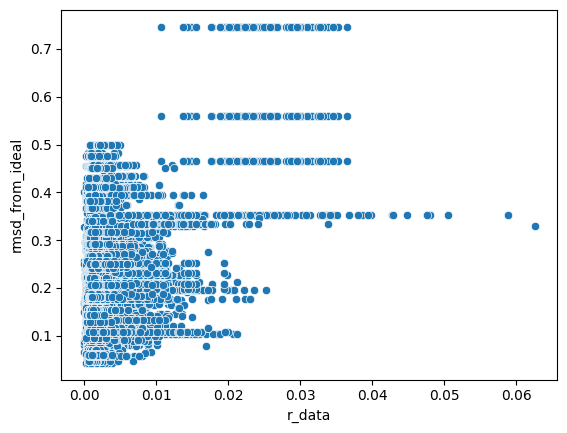

In [5]:
sns.scatterplot(data= df, x='r_data', y='rmsd_from_ideal')

<Axes: xlabel='shear', ylabel='rmsd_from_ideal'>

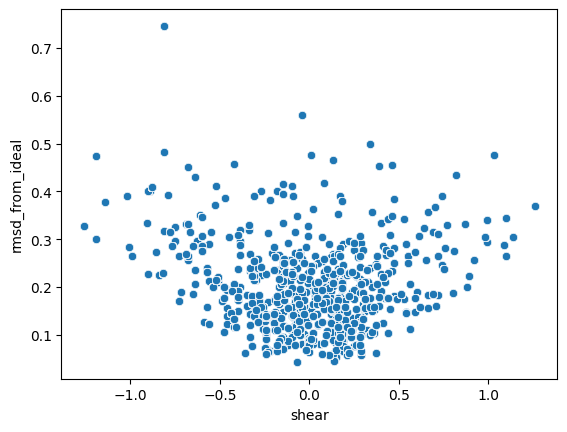

In [6]:
sns.scatterplot(data= df, x='shear', y='rmsd_from_ideal')

<Axes: xlabel='stretch', ylabel='rmsd_from_ideal'>

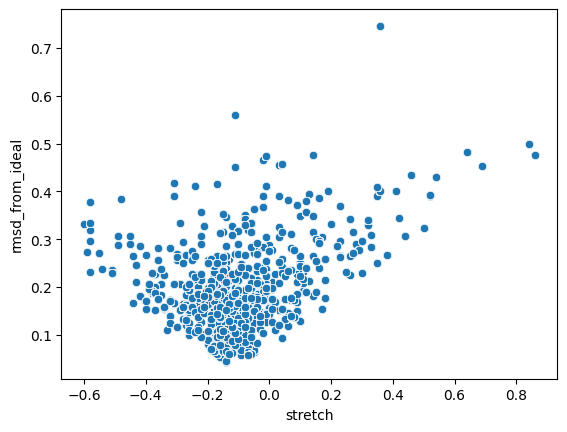

In [7]:
sns.scatterplot(data= df, x='stretch', y='rmsd_from_ideal')

<Axes: xlabel='stagger', ylabel='rmsd_from_ideal'>

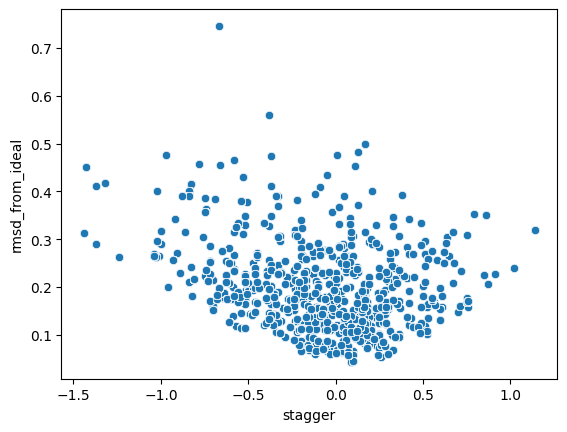

In [8]:
sns.scatterplot(data= df, x='stagger', y='rmsd_from_ideal')

<Axes: xlabel='buckle', ylabel='rmsd_from_ideal'>

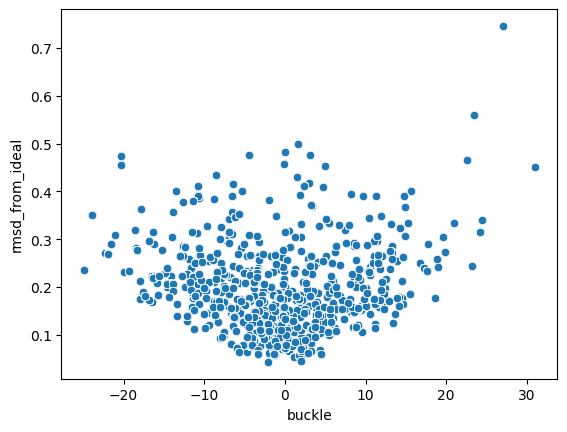

In [9]:
sns.scatterplot(data= df, x='buckle', y='rmsd_from_ideal')

<Axes: xlabel='propeller', ylabel='rmsd_from_ideal'>

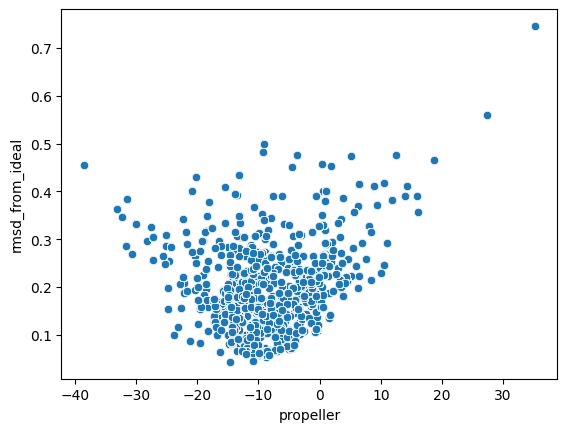

In [10]:
sns.scatterplot(data= df, x='propeller', y='rmsd_from_ideal')

<Axes: xlabel='opening', ylabel='rmsd_from_ideal'>

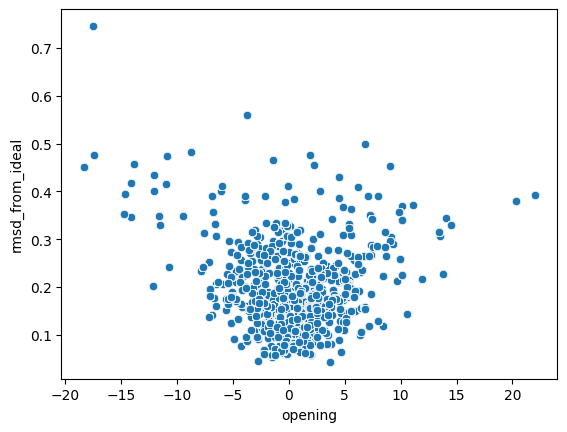

In [11]:
sns.scatterplot(data= df, x='opening', y='rmsd_from_ideal')

<Axes: xlabel='propeller', ylabel='r_data'>

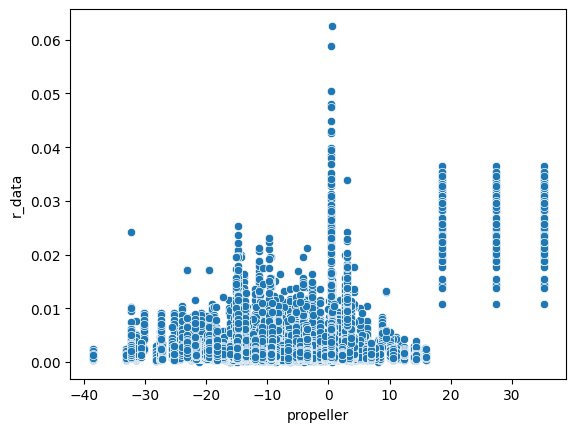

In [12]:
sns.scatterplot(data= df, x='propeller', y='r_data')

<Axes: xlabel='opening', ylabel='r_data'>

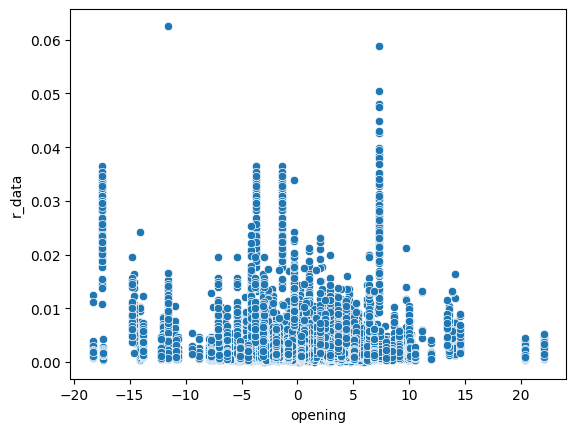

In [13]:
sns.scatterplot(data= df, x='opening', y='r_data')

<Axes: xlabel='buckle', ylabel='r_data'>

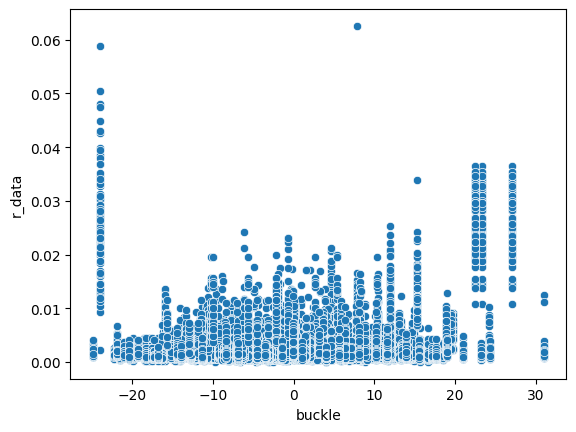

In [14]:
sns.scatterplot(data= df, x='buckle', y='r_data')

<Axes: xlabel='stagger', ylabel='r_data'>

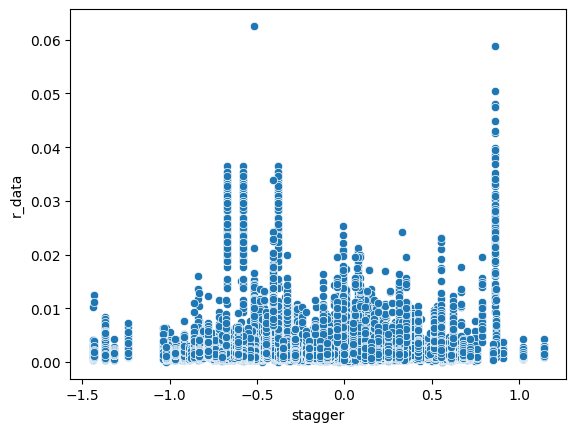

In [15]:
sns.scatterplot(data= df, x='stagger', y='r_data')

<Axes: xlabel='stretch', ylabel='r_data'>

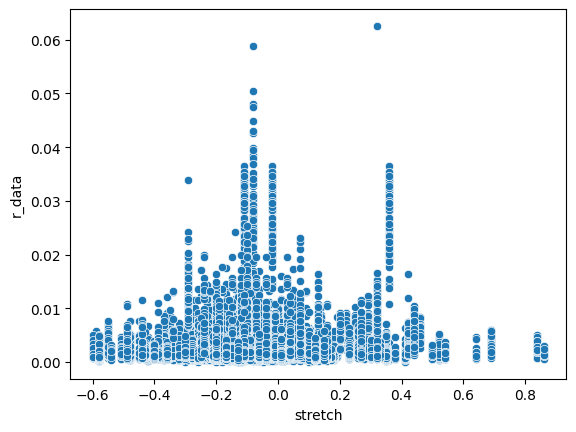

In [16]:
sns.scatterplot(data= df, x='stretch', y='r_data')

<Axes: xlabel='shear', ylabel='r_data'>

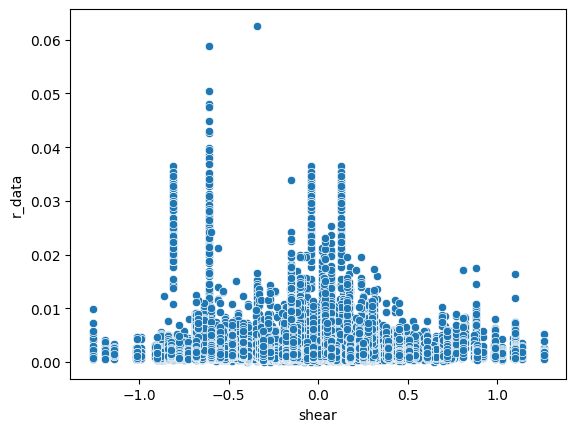

In [17]:
sns.scatterplot(data= df, x='shear', y='r_data')

<Axes: xlabel='shear', ylabel='rmsd_from_ideal'>

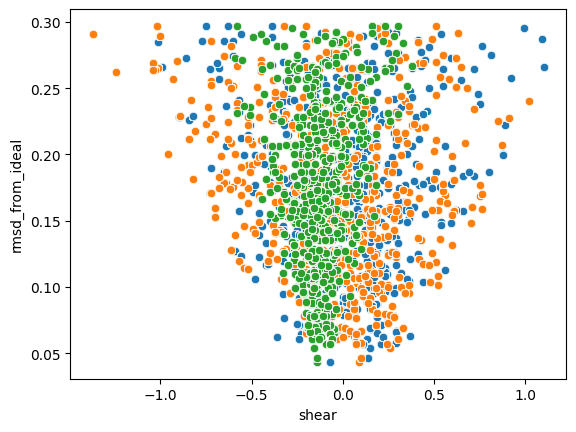

In [18]:
df_sub = df.query("rmsd_from_ideal < 0.3").copy()
sns.scatterplot(data= df_sub, x='shear', y='rmsd_from_ideal')
sns.scatterplot(data= df_sub, x='stagger', y='rmsd_from_ideal')
sns.scatterplot(data= df_sub, x='stretch', y='rmsd_from_ideal')

<Axes: xlabel='buckle', ylabel='rmsd_from_ideal'>

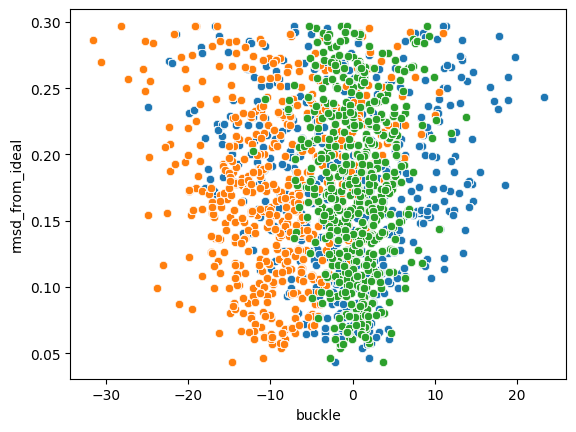

In [19]:
df_sub = df.query("rmsd_from_ideal < 0.3").copy()
sns.scatterplot(data= df_sub, x='buckle', y='rmsd_from_ideal')
sns.scatterplot(data= df_sub, x='propeller', y='rmsd_from_ideal')
sns.scatterplot(data= df_sub, x='opening', y='rmsd_from_ideal')

<Axes: xlabel='shear', ylabel='rmsd_from_ideal'>

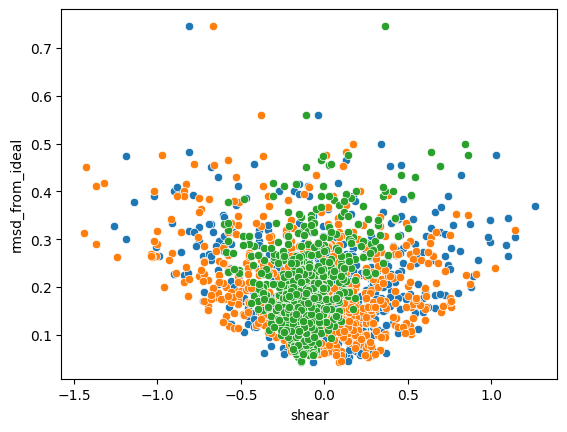

In [20]:
grouped_df = df.groupby(['m_sequence', 'bp', 'pdb_r_pos1', 'pdb_r_pos2', 'rmsd_from_ideal', 'shear', 'stagger', 'stretch'])['r_data'].mean().reset_index()
sns.scatterplot(data= grouped_df, x='shear', y='rmsd_from_ideal')
sns.scatterplot(data= grouped_df, x='stagger', y='rmsd_from_ideal')
sns.scatterplot(data= grouped_df, x='stretch', y='rmsd_from_ideal')

<Axes: xlabel='buckle', ylabel='rmsd_from_ideal'>

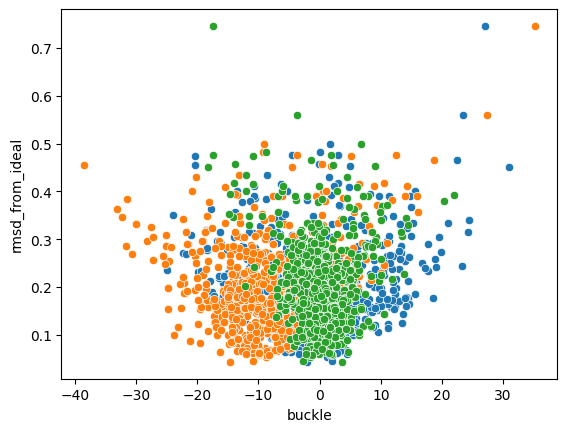

In [21]:
grouped_df = df.groupby(['m_sequence', 'bp', 'pdb_r_pos1', 'pdb_r_pos2', 'rmsd_from_ideal', 'buckle', 'propeller', 'opening'])['r_data'].mean().reset_index()
sns.scatterplot(data = grouped_df, x='buckle', y='rmsd_from_ideal')
sns.scatterplot(data = grouped_df, x='propeller', y='rmsd_from_ideal')
sns.scatterplot(data = grouped_df, x='opening', y='rmsd_from_ideal')

<Axes: xlabel='r_data', ylabel='rmsd_from_ideal'>

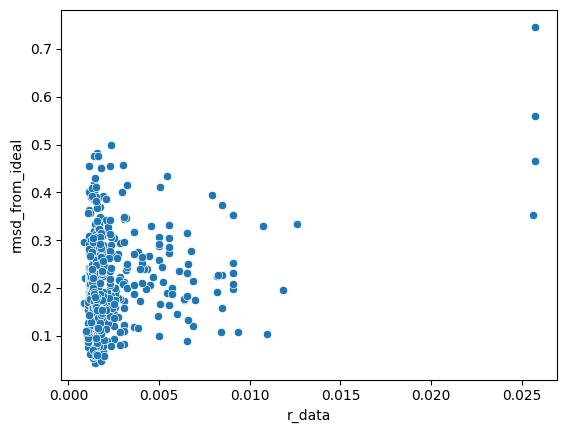

In [22]:
grouped_df = df.groupby(['m_sequence', 'bp', 'pdb_r_pos1', 'pdb_r_pos2', 'rmsd_from_ideal'])['r_data'].mean().reset_index()
sns.scatterplot(data= grouped_df, x='r_data', y='rmsd_from_ideal')

<Axes: xlabel='shear', ylabel='r_data'>

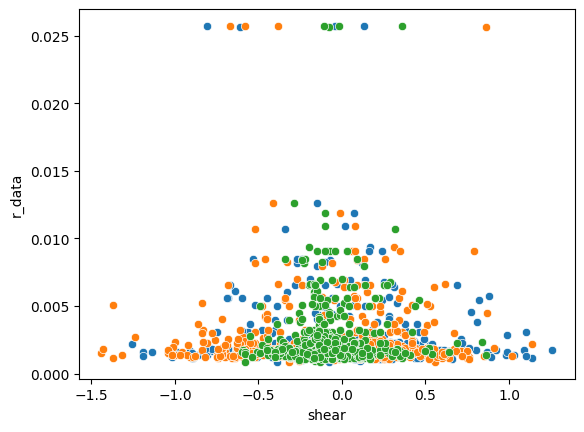

In [23]:
grouped_df = df.groupby(['m_sequence', 'bp', 'pdb_r_pos1', 'pdb_r_pos2', 'rmsd_from_ideal', 'shear', 'stagger', 'stretch'])['r_data'].mean().reset_index()
sns.scatterplot(data= grouped_df, x='shear', y='r_data')
sns.scatterplot(data= grouped_df, x='stagger', y='r_data')
sns.scatterplot(data= grouped_df, x='stretch', y='r_data')

<Axes: xlabel='buckle', ylabel='r_data'>

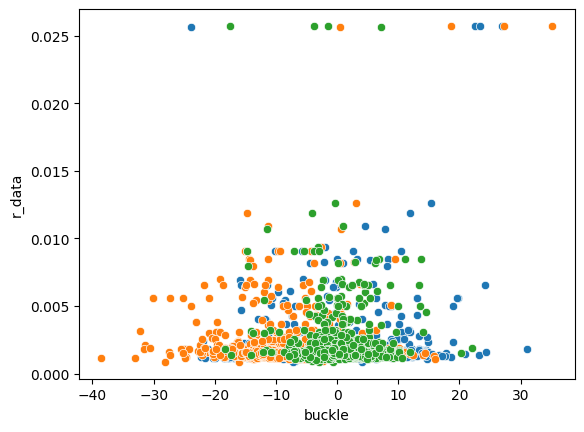

In [24]:
grouped_df = df.groupby(['m_sequence', 'bp', 'pdb_r_pos1', 'pdb_r_pos2', 'rmsd_from_ideal', 'buckle', 'propeller', 'opening'])['r_data'].mean().reset_index()
sns.scatterplot(data = grouped_df, x='buckle', y='r_data')
sns.scatterplot(data = grouped_df, x='propeller', y='r_data')
sns.scatterplot(data = grouped_df, x='opening', y='r_data')

<Axes: xlabel='r_data', ylabel='rmsd_from_ideal'>

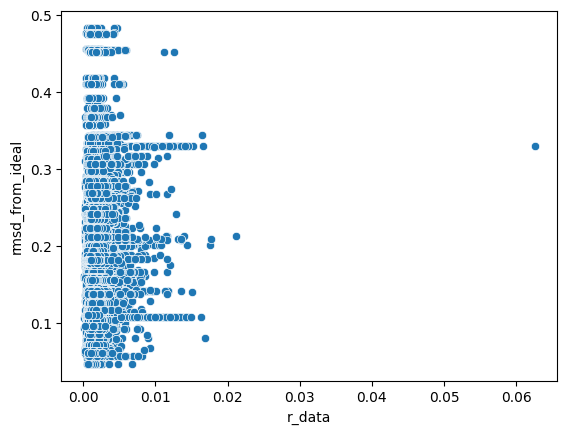

In [25]:
df_sub = df.query("bp == 'CG' or bp == 'GC'").copy()
sns.scatterplot(data= df_sub, x='r_data', y='rmsd_from_ideal')

<Axes: xlabel='r_data', ylabel='rmsd_from_ideal'>

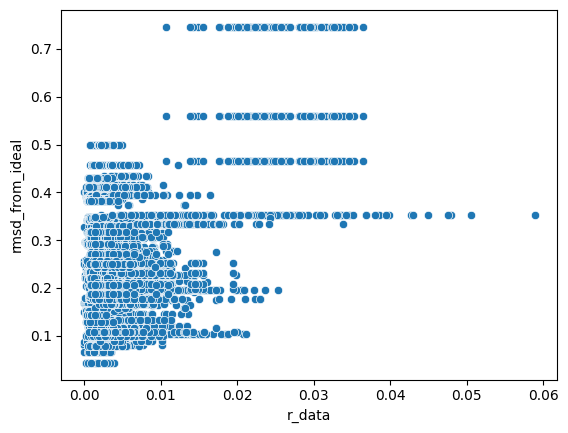

In [26]:
df_sub = df.query("bp == 'AU' or bp == 'UA'").copy()
sns.scatterplot(data= df_sub, x='r_data', y='rmsd_from_ideal')

<Axes: xlabel='r_data', ylabel='bp'>

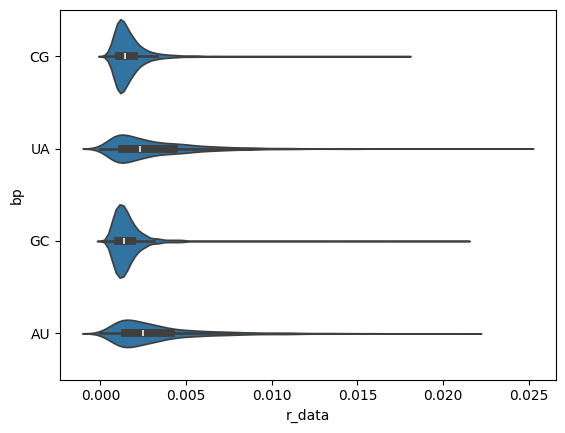

In [27]:
df_sub = df.query("flanking_pairs == 'YES'").copy()
sns.violinplot(data= df_sub, x='r_data', y='bp')

<Axes: xlabel='rmsd_from_ideal', ylabel='bp'>

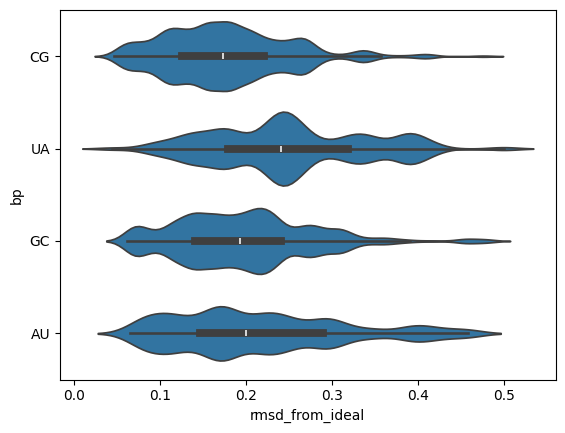

In [28]:
df_sub = df.query("flanking_pairs == 'YES'").copy()
sns.violinplot(data= df_sub, x='rmsd_from_ideal', y='bp')

<Axes: xlabel='r_data', ylabel='bp'>

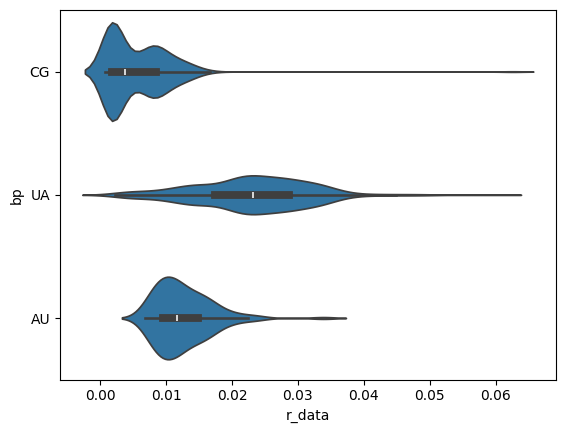

In [29]:
df_sub = df.query("flanking_pairs == 'NO'").copy()
sns.violinplot(data= df_sub, x='r_data', y='bp')

<Axes: xlabel='rmsd_from_ideal', ylabel='bp'>

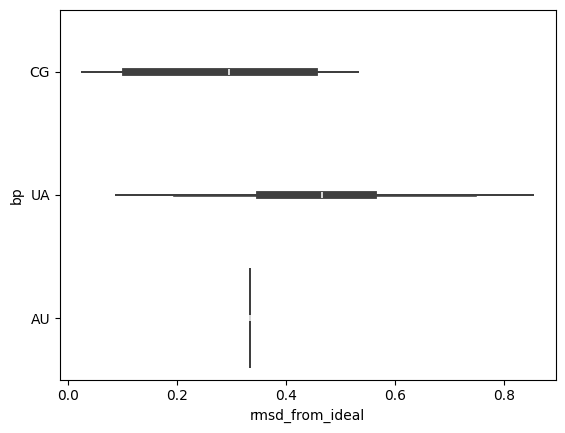

In [30]:
df_sub = df.query("flanking_pairs == 'NO'").copy()
sns.violinplot(data= df_sub, x='rmsd_from_ideal', y='bp')

<Axes: xlabel='bp', ylabel='r_data_binned'>

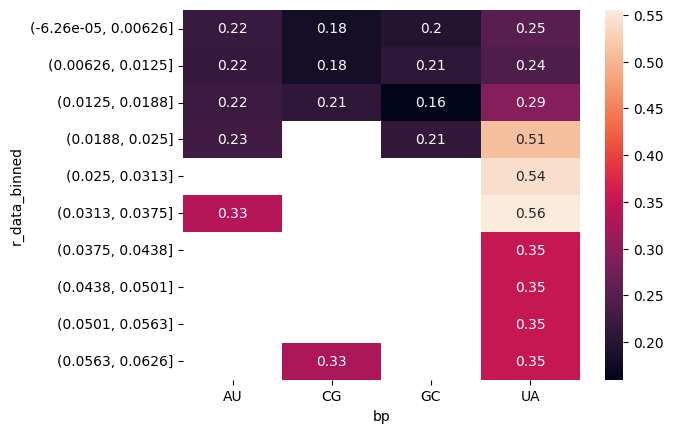

In [31]:
df['r_data_binned'] = pd.cut(df['r_data'], bins=10)
data = df.pivot_table(index="r_data_binned", columns="bp", values="rmsd_from_ideal", aggfunc='mean')
sns.heatmap(data,annot=True)

<Axes: xlabel='bp', ylabel='rmsd_from_ideal_binned'>

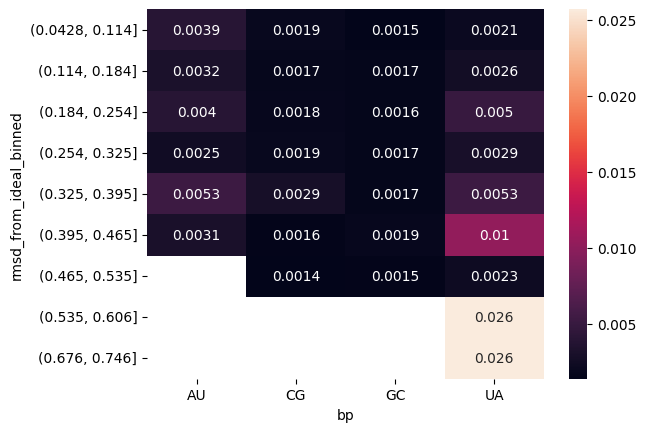

In [32]:
df['rmsd_from_ideal_binned'] = pd.cut(df['rmsd_from_ideal'], bins=10)
data = df.pivot_table(index="rmsd_from_ideal_binned", columns="bp", values="r_data", aggfunc='mean')
sns.heatmap(data,annot=True)

<Axes: xlabel='r_data_binned', ylabel='rmsd_from_ideal_binned'>

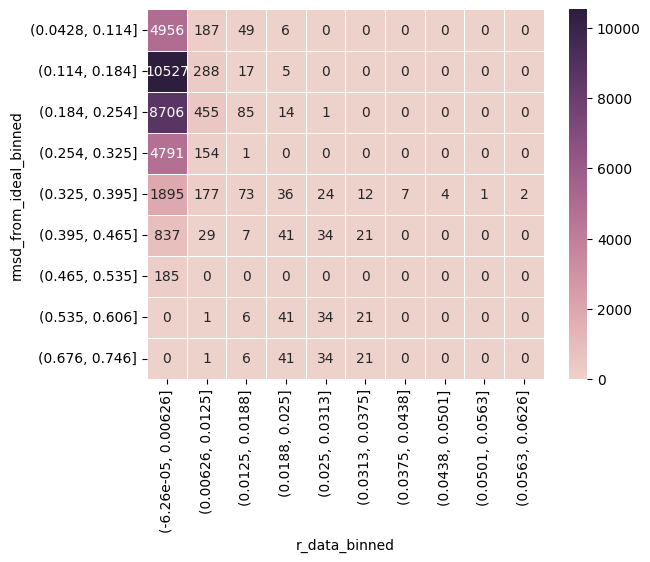

In [33]:
df['rmsd_from_ideal_binned'] = pd.cut(df['rmsd_from_ideal'], bins=10)
df['r_data_binned'] = pd.cut(df['r_data'], bins=10)
df_sns = pd.crosstab(df['rmsd_from_ideal_binned'], df['r_data_binned'])
sns.heatmap(df_sns, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidth=.5, fmt='.0f')